### Выберите наборы данных, которые можно интерпретировать, как временные ряды:

а) зависимость цены на недвижимость в еонкретном регионе от времени,

б) скорость полета самолета при перелете из аэропорта А в аэропорт В,

в) количество отказов компьютера,

г) число обращений в поликлинику по району,

д) координаты автобуса при движении по маршруту,

е) координаты фигуры нарушителя в файле видеофиксации охранной системы.

#### Ответ:
a, б и д

### Прочитайте DUQ_hourly.csv и проверьте качество и порядок разметки этой выборки с информацией о потреблении энергии в одном из районов Восточной Электросети США. Сделайте описание особенностей этой выборки.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [2]:
data = pd.read_csv('DUQ_hourly.csv', index_col = [0], parse_dates = [0])

In [3]:
data

,DUQ_MW
Datetime,
2005-12-31 01:00:00,1458.0
2005-12-31 02:00:00,1377.0
2005-12-31 03:00:00,1351.0
2005-12-31 04:00:00,1336.0
2005-12-31 05:00:00,1356.0
2005-12-31 06:00:00,1372.0
2005-12-31 07:00:00,1402.0
2005-12-31 08:00:00,1425.0
2005-12-31 09:00:00,1502.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 119068 entries, 2005-12-31 01:00:00 to 2018-01-02 00:00:00
Data columns (total 1 columns):
DUQ_MW    119068 non-null float64
dtypes: float64(1)
memory usage: 1.8 MB


In [5]:
data.describe()

,DUQ_MW
count,119068.000000
mean,1658.820296
std,301.740640
min,1014.000000
25%,1444.000000
50%,1630.000000
75%,1819.000000
max,3054.000000


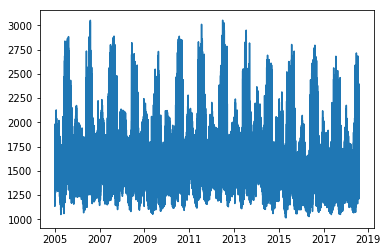

In [6]:
plt.plot(data)

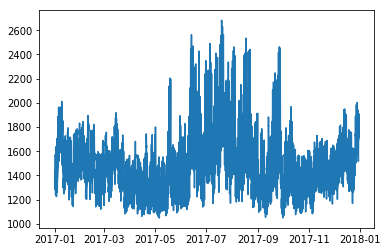

In [7]:
plt.plot(data.loc[(data.index > '01.01.2017') & (data.index <= '31.12.2017')])

##### Выборка содержит 119068 значений на конец каждого часа за период с 31/12/2005 по 02/01/2018, среднее значение - 1659, стандартное отклонение - 302. Пропусков нет, существенных выбросов нет. Есть видимая периодичность - максимальные значения в летние месяцы и локальные пики в январе-феврале.

### Прочитайте базу Brent и сделайте ее перерасчет (ресемплинг) в представление по неделям, по месяцам.

In [11]:
brent = pd.read_excel('нефть-brent 2010-2019.xlsx', index_col = [0], parse_dates = [0])

In [12]:
brent

,Значение
Дата,
2019-09-01,58.84
2019-08-30,59.19
2019-08-29,60.37
2019-08-28,59.84
2019-08-27,59.59
2019-08-26,58.26
2019-08-25,57.81
2019-08-23,58.94
2019-08-22,60.05


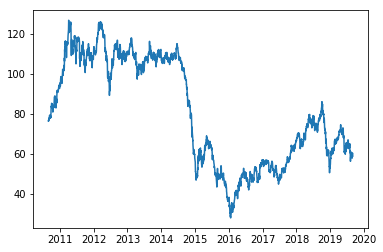

In [13]:
plt.plot(brent)

In [14]:
brent_weeks = brent.resample('W').mean()
brent_weeks

,Значение
Дата,
2010-09-05,76.616000
2010-09-12,77.673333
2010-09-19,78.693333
2010-09-26,78.518333
2010-10-03,81.211667
2010-10-10,84.146667
2010-10-17,83.498333
2010-10-24,82.795000
2010-10-31,83.361667


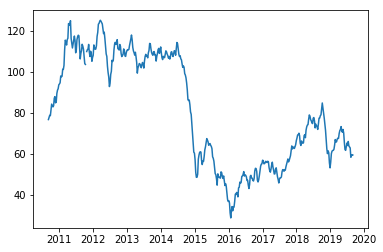

In [15]:
plt.plot(brent_weeks)

In [16]:
brent_months = brent.resample('M').mean()
brent_months

,Значение
Дата,
2010-09-30,78.228148
2010-10-31,83.473462
2010-11-30,86.178077
2010-12-31,92.232308
2011-01-31,97.033200
2011-02-28,104.451250
2011-03-31,114.811538
2011-04-30,123.197826
2011-05-31,114.345385


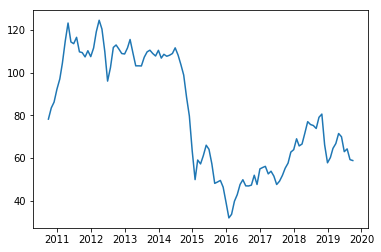

In [17]:
plt.plot(brent_months)

In [18]:
brent_years = brent.resample('Y').mean()
brent_years

,Значение
Дата,
2010-12-31,84.963238
2011-12-31,110.758746
2012-12-31,111.377484
2013-12-31,108.137114
2014-12-31,99.435493
2015-12-31,53.969743
2016-12-31,45.350502
2017-12-31,54.720814
2018-12-31,71.651419


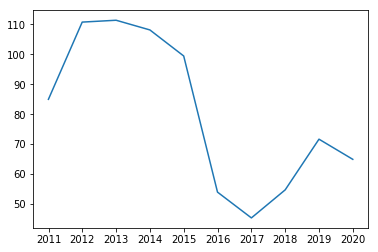

In [19]:
plt.plot(brent_years)

### Постройте график изменения среднего по выборке и среднего отклонения по выборке на недельных, месячных и годовых группах для Brent.

In [20]:
brent_avg = {'weekly average': brent_weeks.mean()[0], 'monthly average':brent_months.mean()[0], 'annual average': brent_years.mean()[0]}

In [21]:
brent_std = {'weekly std': brent_weeks.std()[0], 'monthly std':brent_months.std()[0], 'annual std': brent_years.std()[0]}

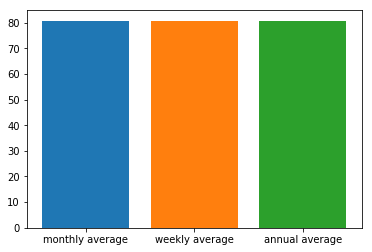

In [22]:
for key, value in brent_avg.items():
    plt.bar(key, value)

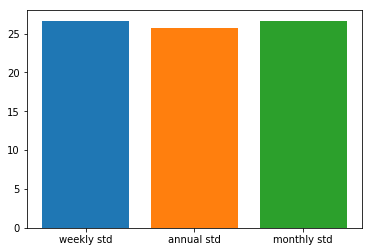

In [23]:
for key, value in brent_std.items():
    plt.bar(key, value)

### Сделайте вывод о том, как изменилось поведение цены на недельных и месячных графиках по сравнению с дневными.

#### Ответ:
Срок ресемплинга почти не влияет на статистику.